# Challenge 3

In [17]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [18]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [19]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [24]:
# your code here- numerical variable
titanic.select_dtypes(exclude=[object])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [25]:
#your code here- categorical variable
titanic.select_dtypes(include=[object])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [26]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12, 6));

<Figure size 960x480 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

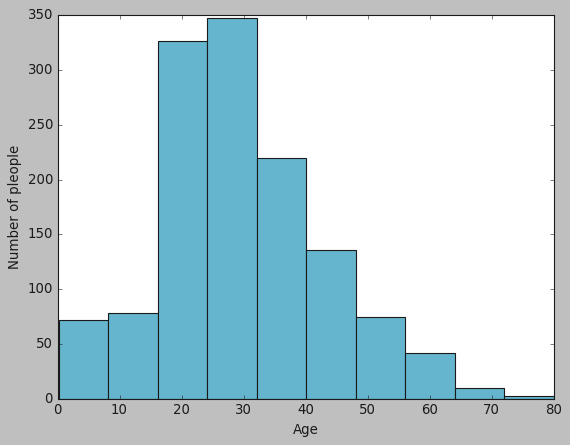

In [29]:
# your code here
plt.hist(titanic['Age'], color='c')
plt.xlabel('Age')
plt.ylabel('Number of pleople')

plt.show();

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

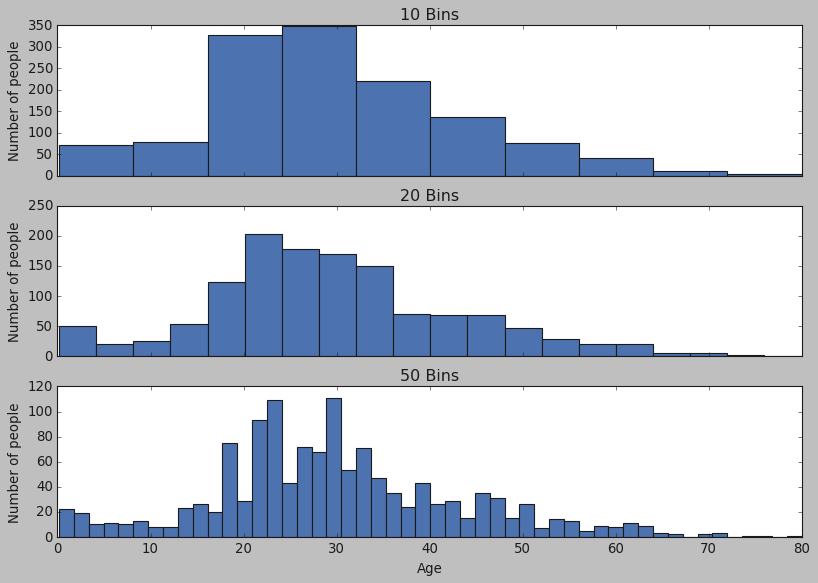

In [30]:
# your code here
fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

ax[0].title.set_text('10 Bins')
ax[0].set_xticklabels([])
ax[0].hist(titanic['Age'], bins=10)
ax[0].set_ylabel('Number of people')

ax[1].title.set_text('20 Bins')
ax[1].set_xticklabels([])
ax[1].hist(titanic['Age'], bins=20)
ax[1].set_ylabel('Number of people')

ax[2].title.set_text('50 Bins')
ax[2].hist(titanic['Age'], bins=50)
ax[2].set_ylabel('Number of people')
ax[2].set_xlabel('Age')

plt.show();

#### Whether the bin size affects your plot? Why?

In [31]:
#your comment here

# Si, el tamaños de los intervalos afecta a la grafica. Esto se debe, a que dependiendo del numero de intervalos
# podemos mostrar una menor o mayor cantidad de valores (si el numero de intervalos es pequeño vamos a tener valores
# agrupados que no se van a tener en cuenta, como es el caso del ejemplo previo). Es importa utilizar un numero de 
# intervalos correcto para no equivocarse al leer la grafica.

#### Use seaborn to show the distribution of the column `Age`

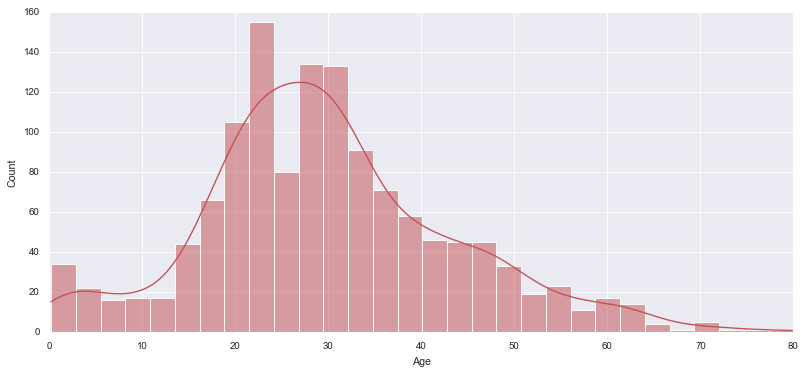

In [32]:
# your code here
sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (12, 5)})
sns.set_palette('tab10')

sns.histplot(titanic['Age'], color='r', kde=True);

# Podemos ver que la libreria de seaborn ajusta los bins automaticamente y de una forma correcta.

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

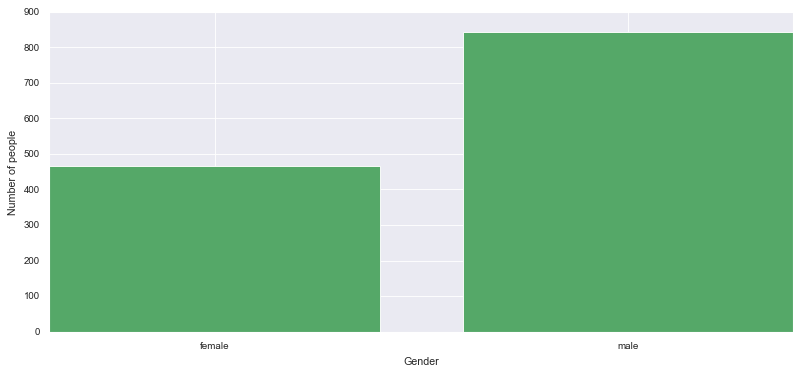

In [33]:
# your code here- 1st way
titanic_genders = titanic.groupby('Gender', as_index=False).count()
titanic_genders

x = titanic_genders['Gender']
y = titanic_genders['PassengerId']

plt.bar(x, height=y, color='g')
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.show()

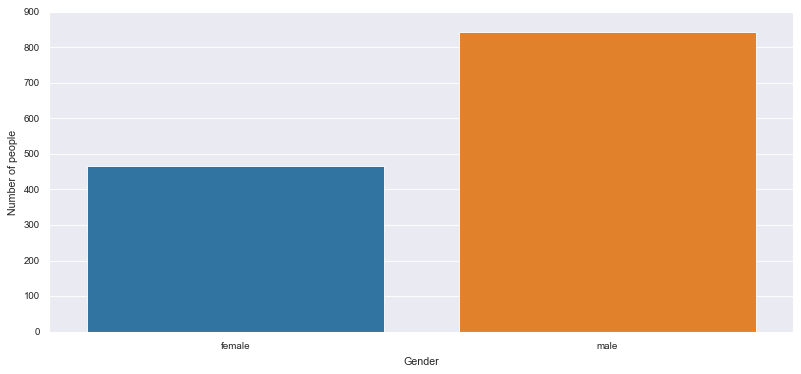

In [34]:
# your code here- 2nd way
sns.barplot(x=x, y=y)
plt.ylabel('Number of people');

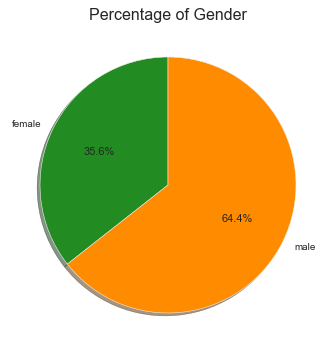

In [35]:
# Tambien podriamos hacer un grafico de pie
plt.style.use('ggplot')
colors = ['forestgreen', 'darkorange']
plt.pie(y, labels=x, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title('Percentage of Gender')

plt.show()

#### Use the appropriate plot to visualize the column `Pclass` 


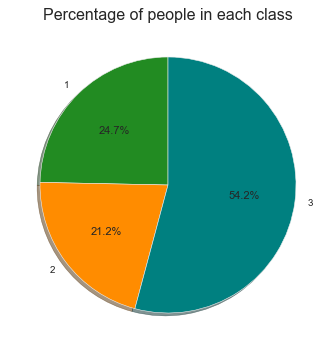

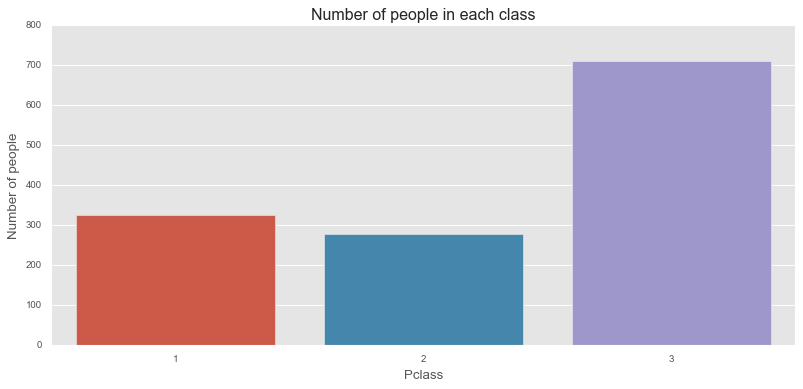

In [36]:
# your code here
titanic_class = titanic.groupby('Pclass', as_index=False).count()
titanic_class

x = titanic_class['Pclass']
y = titanic_class['PassengerId']

# Grafico tipo pie
plt.style.use('ggplot')
colors = ['forestgreen', 'darkorange', 'teal']
plt.pie(y, labels=x, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title('Percentage of people in each class')
plt.show()

# Grafico de barras
plt.style.use('ggplot')
sns.barplot(x=x, y=y)
plt.title('Number of people in each class')
plt.ylabel('Number of people')
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

In [40]:
# your code here
titanic['Age'].describe()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

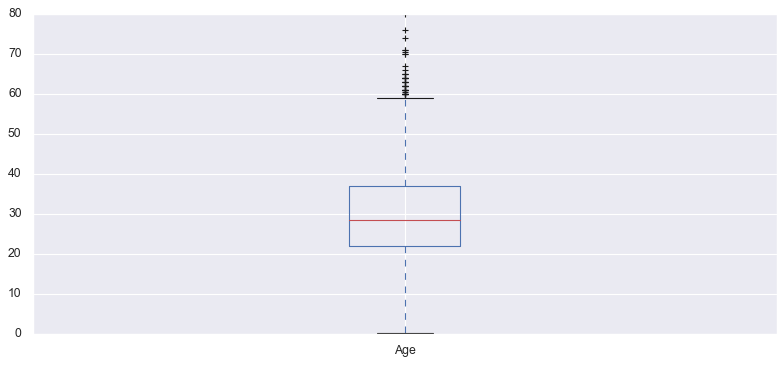

In [59]:
# sns.boxplot(titanic['Age']);

plt.boxplot(titanic['Age'], labels=['Age']);

#### What does the previous plot tell you about the feature `Age`? Comment.

In [60]:
# your comment here
# Tenemos valores outliners. Ademas, nos dice que la edad media esta alrededor de los 29 años, el percentil 25% nos da una
# edad de 22 años, el valor minimo es cercano a cero (seguramente le pertenecia a un bebe), el percentil 75% nos da una edad
# alrededor de los 38 años y el valor maximo se situa en los 69 años.

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

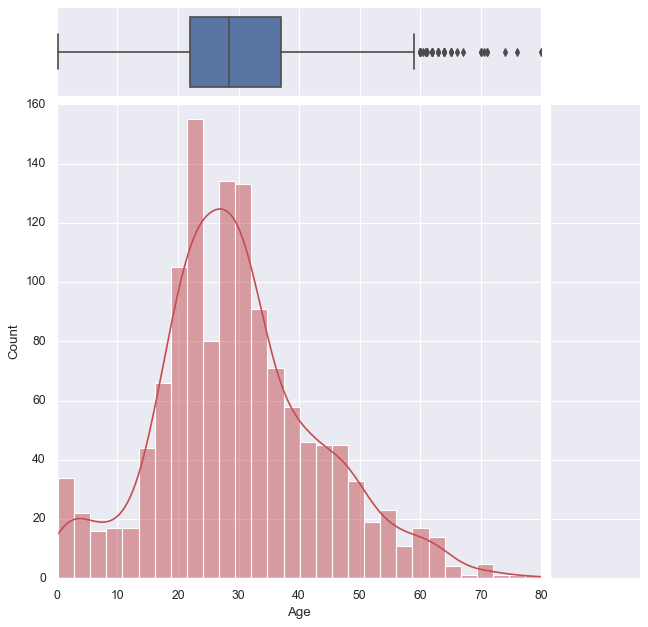

In [61]:
#your code here
sns.set(style="darkgrid")
fig = sns.JointGrid(data=titanic, x='Age', height=8, space=0.1)
fig.plot_joint(sns.histplot, kde=True, color='r')
fig.plot_marginals(sns.boxplot);

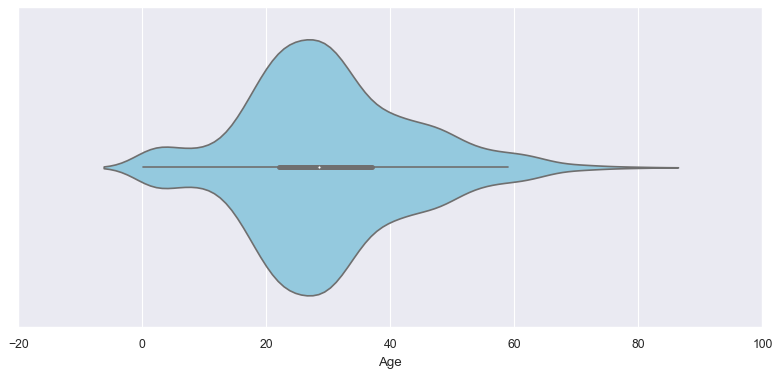

In [62]:
# Tambien podemos hacer una grafica de violin 
# Con esta grafica obtenemos un resumen de las estadisticas (boxplot) y tambien, podemos observar la distribucion

sns.set(style="darkgrid")
sns.violinplot(data=titanic, x='Age', color='skyblue')
plt.show();

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [63]:
#your comment here
# Podemos observar que la edad presenta una distribucion normal, como es de esperar. Hay pocas personas mayores a 60 años,
# la mayoria de los datos se encuentran dentro de grafica de caja.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

In [64]:
#your code-1st way
titanic[['Fare', 'Age']].corr()

,Fare,Age
Fare,1.000000,0.171355
Age,0.171355,1.000000


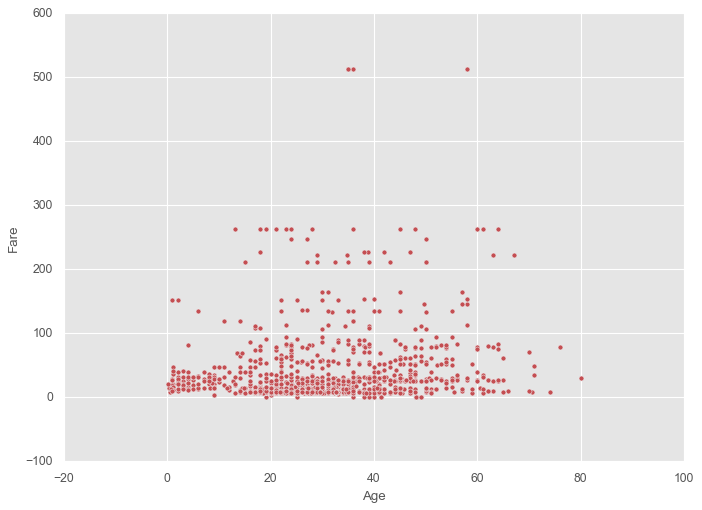

In [73]:
y = titanic['Fare']
x = titanic['Age']

plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
plt.scatter(x=x, y=y, c='r')
plt.ylabel('Fare')
plt.xlabel('Age')

plt.show();

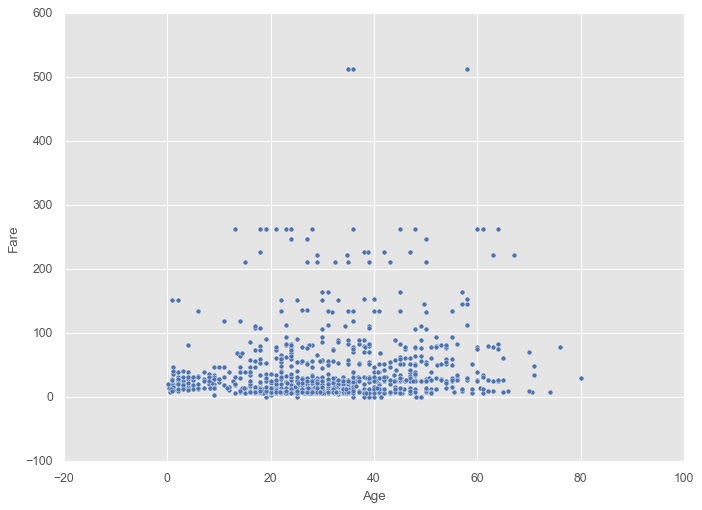

In [74]:
# your code-2nd way
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x, y=y)

plt.show();

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

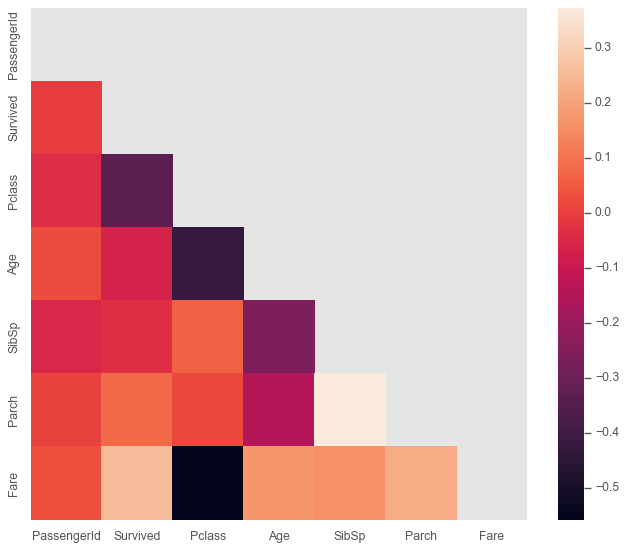

In [77]:
#your code here
mask = np.zeros_like(titanic.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(10,8))
sns.heatmap(titanic.corr(), mask=mask);

#### According to the previous plot, what are the most correlated feature? Comment.

In [78]:
#your comment here
# Las columnas mas relacionadas directamente proporcional son: fare-survived y Parch-SibSp
# las columnas mas relacionadas inversamente proporcional son: Fare-Pclass, Age-Pclass y Survived-Pclass

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

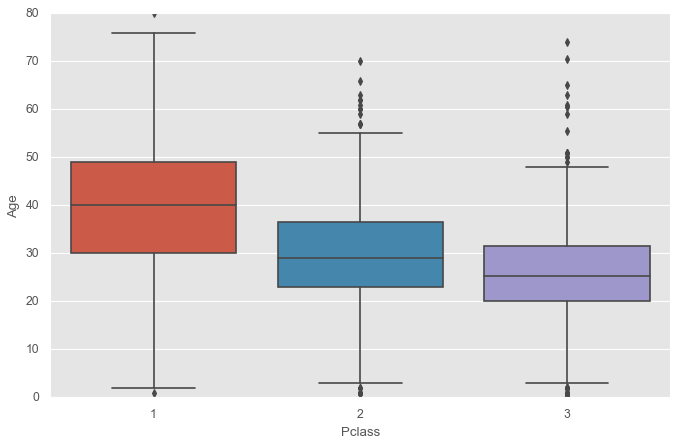

In [80]:
#your code here
plt.figure(figsize=(10, 6))
sns.boxplot(x=titanic['Pclass'], y=titanic['Age']);
# Graficamos un resumen de las estadisticas de la columna edad para cada uno de los valores de Pclass

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

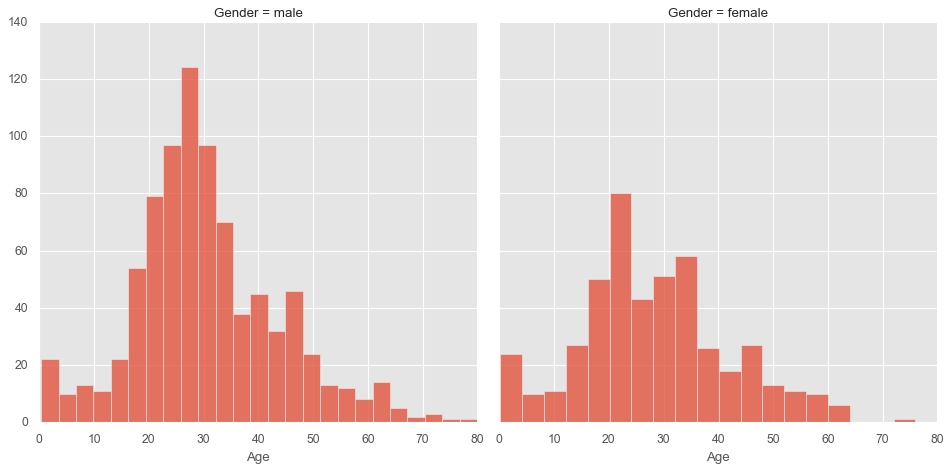

In [81]:
#your code here
fig = sns.FacetGrid(titanic, col='Gender', height=6, aspect=1) 
# col o row le dice como quiere separar las graficas. Al usar col las separo en columnas por la variable del genero

fig.map(sns.histplot, 'Age'); 
# le decimos que columna quiere que grafique